### Import Libraries

In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
def accuracy(y_test, y_pred):
    return np.sum(y_pred == y_test) / len(y_test)

In [91]:
def decision_boundary(epoch, X, y, weights, bias):
        plt.figure()
        plt.rcParams['figure.figsize'] = [4, 3.2]
        plt.scatter(X[:, 0], X[:, 1], c = y)
        x1 = np.linspace(-3.2, 3.2, 100)
        x2 = -(weights[0] * x1 + bias) / weights[1]
        plt.plot(x1, x2, 'r')
        plt.xlim(-3.2, 3.2)
        plt.ylim(-3.2, 3.2)
        plt.title("Interation: " + str(epoch))
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.show(block = False)
        plt.pause(0.1)
        plt.close()

### Perceptron Implementation

In [92]:
class Perceptron:
    def __init__(self, learning_rate = 0.01, epochs = 1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.converged = False
        self.iterations = 0

    def activation(self, z):
        return 1 if z >= 0 else 0

    def forward_prop(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)
    
    def backward_prop(self, X, y, y_hat):
        self.weights += self.learning_rate * (y - y_hat) * X
        self.bias += self.learning_rate * (y - y_hat)
    
    def fit(self, X, y):
        self.n_features = X.shape[1]

        self.weights = np.zeros(self.n_features)
        self.bias = 0

        for epoch in range(1, self.epochs + 1):
            misClassified = 0
            for i in range(len(X)):
                y_hat = self.forward_prop(X[i])
                if y_hat != y[i]:
                    misClassified += 1
                    self.backward_prop(X[i], y[i], y_hat)
            if misClassified == 0:
                self.converged = True
                self.iterations = epoch - 1
                break
            print(f"Iteration: {epoch} | Weights: {self.weights} | Bias: {self.bias}")
            decision_boundary(epoch, X, y, self.weights, self.bias)
    
    def predict(self, X):
        y_hat = []
        for i in range(len(X)):
            y_hat.append(self.forward_prop(X[i]))
        return np.array(y_hat)
    
    def get_convergence(self):
        return self.converged, self.iterations
    
    def get_params(self):
        return self.weights, self.bias

### SVM Implementation

In [93]:
class SVM:
    def __init__(self, learning_rate = 0.01, epochs = 1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def activation(self, z):
        return 1 if z >= 0 else 0
    
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        for epoch in range(1, self.epochs + 1):
            for i in range(len(X)):
                if y[i] * (np.dot(self.weights, X[i]) + self.bias) >= 1:
                    self.weights -= self.learning_rate * (2 * 1 / epoch * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * 1 / epoch * self.weights - np.dot(X[i], y[i]))
                    self.bias -= self.learning_rate * y[i]
            print(f"Iteration: {epoch} | Weights: {self.weights} | Bias: {self.bias}")
            decision_boundary(epoch, X, y, self.weights, self.bias)
    
    def predict(self, X):
        y_hat = []
        for i in range(len(X)):
            z = np.dot(X[i], self.weights) + self.bias
            y_hat.append(self.activation(z))
        return np.array(y_hat)

### Load Data

In [94]:
# X and Y for AND gate
X = np.array([[2, 2], [-1, -3], [-1, 2], [0, -1], [1, 3], [-1, -2], [1, -2], [-1, -1]])
Y = np.array([1, 0, 1, 0, 1, 0, 0, 1])

### Training (Perceptron)

In [95]:
p1 = Perceptron(learning_rate=0.01)
p2 = Perceptron(learning_rate=0.5)

Iteration: 1 | Weights: [0.   0.02] | Bias: 0.0


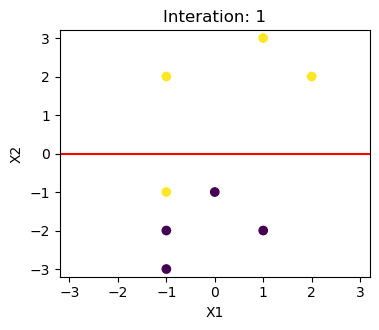

Iteration: 2 | Weights: [-0.01  0.01] | Bias: 0.01


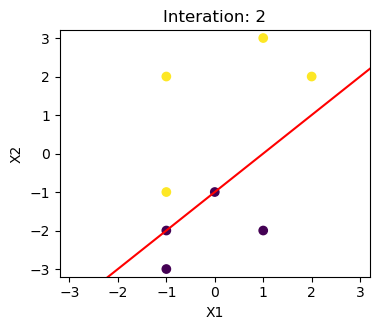

Iteration: 3 | Weights: [-0.02  0.01] | Bias: 0.01


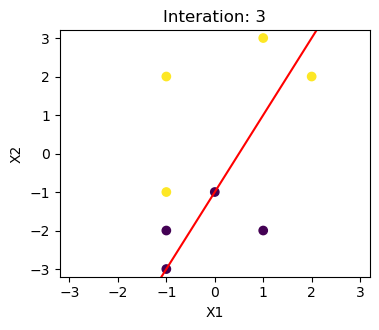

Iteration: 4 | Weights: [-0.01  0.02] | Bias: 0.03


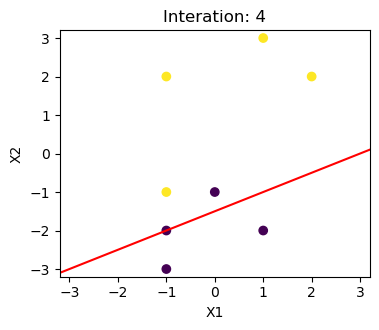

Iteration: 5 | Weights: [-0.01  0.03] | Bias: 0.019999999999999997


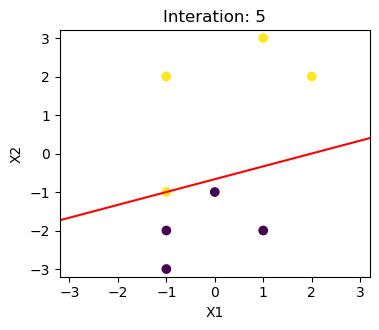

In [96]:
p1.fit(X, Y)

Iteration: 1 | Weights: [0. 1.] | Bias: 0.0


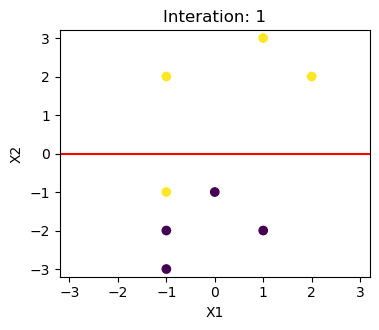

Iteration: 2 | Weights: [-0.5  0.5] | Bias: 0.5


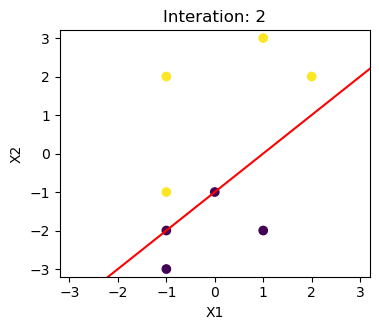

Iteration: 3 | Weights: [-1.   0.5] | Bias: 0.5


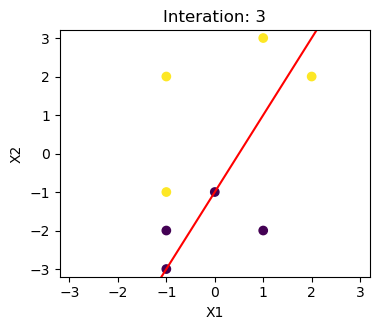

Iteration: 4 | Weights: [-0.5  1. ] | Bias: 1.5


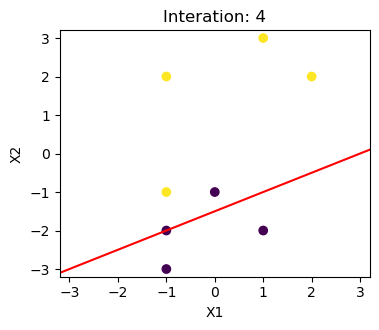

Iteration: 5 | Weights: [-0.5  1.5] | Bias: 1.0


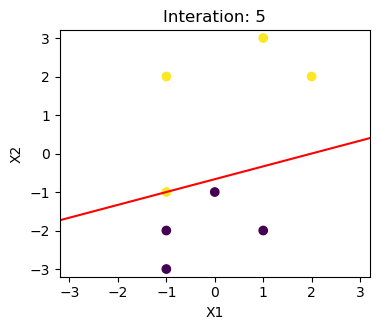

In [97]:
p2.fit(X, Y)

### Convergence (Perceptron)

In [98]:
print("Iterations required to converge the perception algorithm : ", p1.iterations)
print("Iterations required to converge the perception algorithm : ", p2.iterations)

Iterations required to converge the perception algorithm :  5
Iterations required to converge the perception algorithm :  5


### Prediction (Perceptron)

In [99]:
y_pred_p1 = p1.predict(X)
y_pred_p2 = p2.predict(X)
print("Actual values :", Y)
print("\nPredicted values (learning rate = 0.01):", y_pred_p1)
print("Predicted values (learning rate = 0.5)   :", y_pred_p2)

Actual values : [1 0 1 0 1 0 0 1]

Predicted values (learning rate = 0.01): [1 0 1 0 1 0 0 1]
Predicted values (learning rate = 0.5)   : [1 0 1 0 1 0 0 1]


### Accuracy (Perceptron)

In [100]:
acc_p1 = accuracy(Y, y_pred_p1)
print("Accuracy (learning rate = 0.01):", acc_p1 * 100, "%")
acc_p2 = accuracy(Y, y_pred_p2)
print("Accuracy (learning rate = 0.5) :", acc_p2 * 100, "%")

Accuracy (learning rate = 0.01): 100.0 %
Accuracy (learning rate = 0.5) : 100.0 %


### Training (SVM)

Iteration: 1 | Weights: [0.00773522 0.05367669] | Bias: -0.04


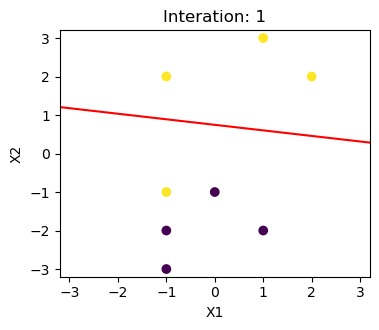

Iteration: 2 | Weights: [0.01597203 0.10629996] | Bias: -0.08


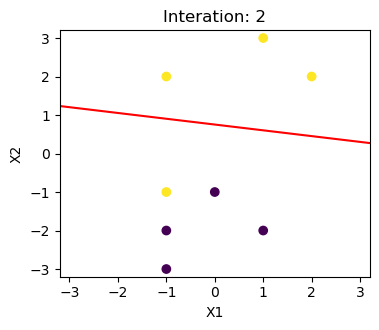

Iteration: 3 | Weights: [0.02435518 0.15859244] | Bias: -0.11999999999999998


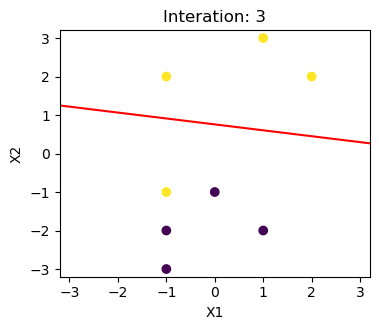

Iteration: 4 | Weights: [0.03280653 0.21072629] | Bias: -0.16


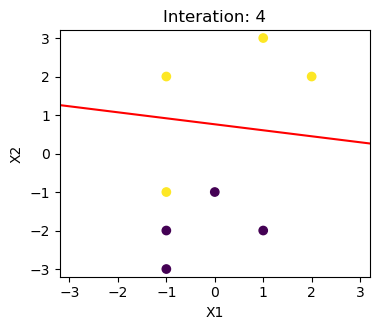

Iteration: 5 | Weights: [0.04129686 0.262768  ] | Bias: -0.20000000000000004


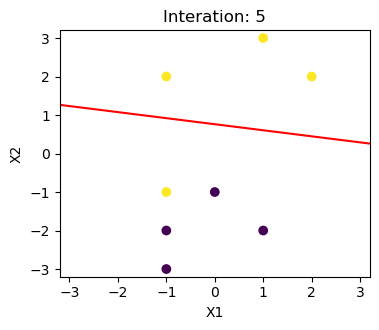

Iteration: 6 | Weights: [0.04981224 0.31474992] | Bias: -0.24000000000000007


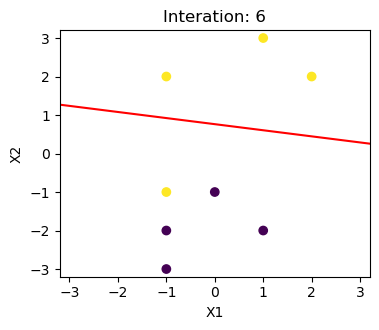

Iteration: 7 | Weights: [0.05834498 0.36669008] | Bias: -0.2800000000000001


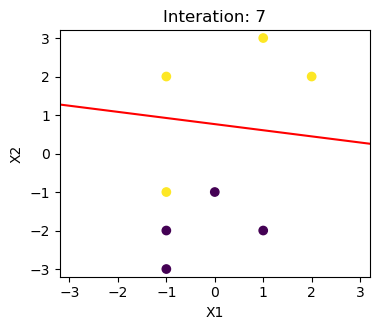

Iteration: 8 | Weights: [0.06689042 0.41859956] | Bias: -0.3200000000000001


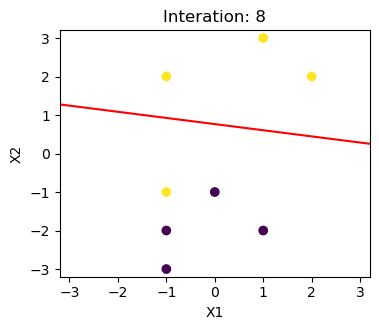

Iteration: 9 | Weights: [0.06551204 0.44068513] | Bias: -0.35000000000000014


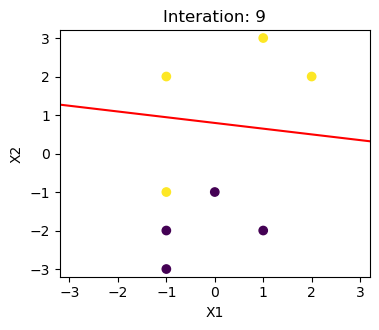

Iteration: 10 | Weights: [0.06429243 0.4632058 ] | Bias: -0.38000000000000017


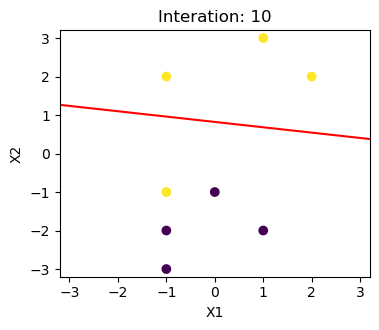

Iteration: 11 | Weights: [0.06320061 0.48607666] | Bias: -0.4100000000000002


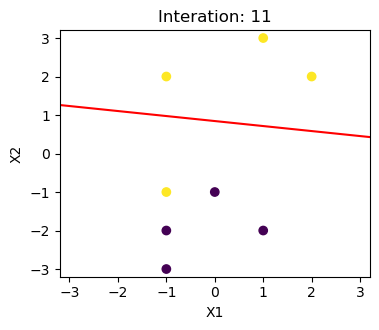

Iteration: 12 | Weights: [0.06221372 0.50923504] | Bias: -0.4400000000000002


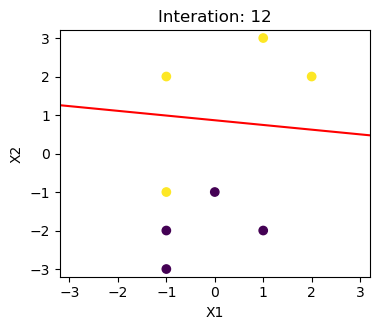

Iteration: 13 | Weights: [0.06131442 0.53263341] | Bias: -0.47000000000000025


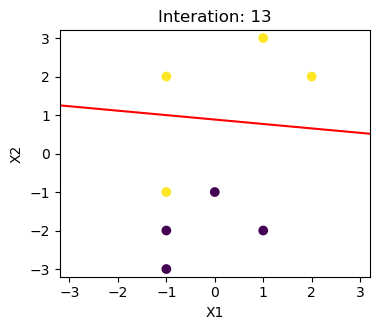

Iteration: 14 | Weights: [0.06048926 0.55623492] | Bias: -0.5000000000000002


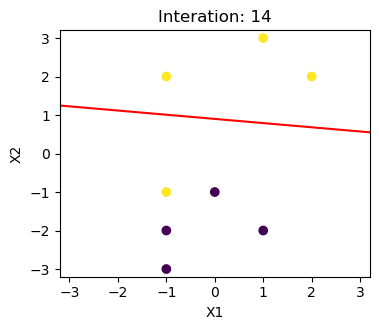

Iteration: 15 | Weights: [0.05972761 0.58001047] | Bias: -0.5300000000000002


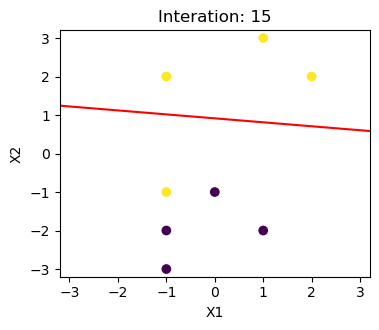

Iteration: 16 | Weights: [0.05902094 0.60393664] | Bias: -0.5600000000000003


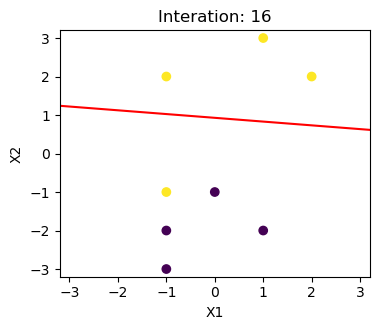

Iteration: 17 | Weights: [0.05836229 0.62799438] | Bias: -0.5900000000000003


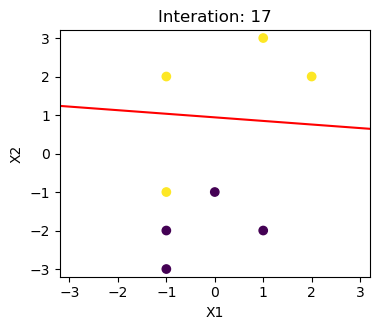

Iteration: 18 | Weights: [0.05774592 0.65216797] | Bias: -0.6200000000000003


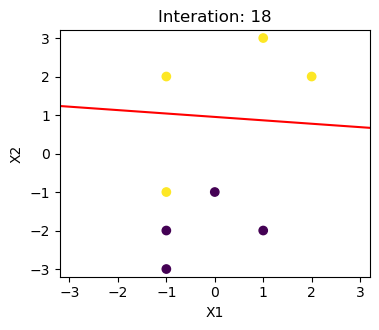

Iteration: 19 | Weights: [0.05716704 0.67644427] | Bias: -0.6500000000000004


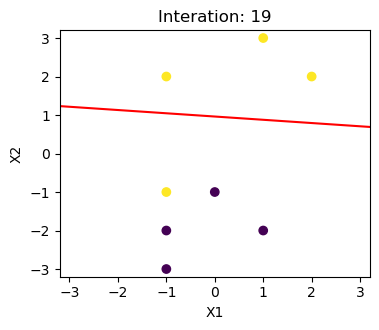

Iteration: 20 | Weights: [0.05662162 0.70081224] | Bias: -0.6800000000000004


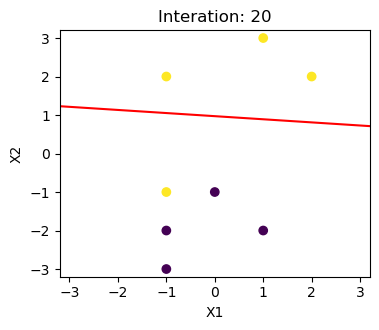

Iteration: 21 | Weights: [0.05610623 0.72526247] | Bias: -0.7100000000000004


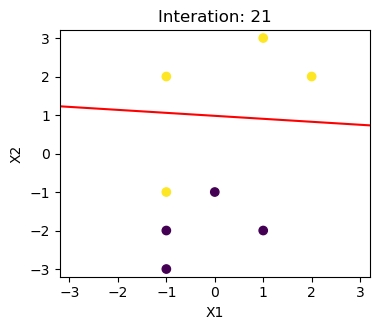

Iteration: 22 | Weights: [0.05561793 0.74978692] | Bias: -0.7400000000000004


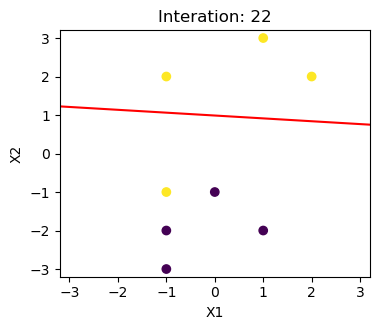

Iteration: 23 | Weights: [0.05515418 0.77437863] | Bias: -0.7700000000000005


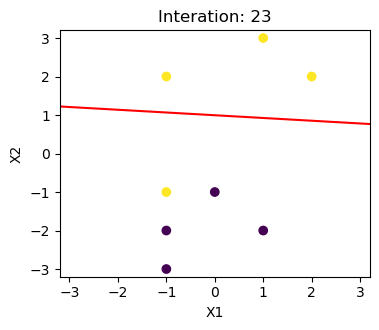

Iteration: 24 | Weights: [0.05471277 0.79903157] | Bias: -0.8000000000000005


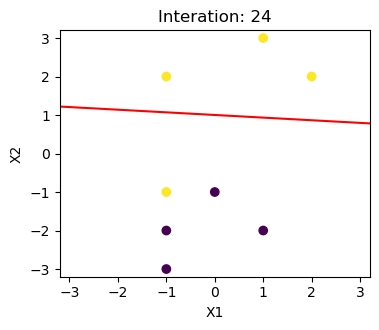

Iteration: 25 | Weights: [0.0542918  0.82374046] | Bias: -0.8300000000000005


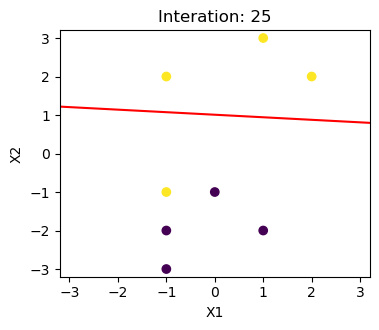

Iteration: 26 | Weights: [0.05388955 0.84850066] | Bias: -0.8600000000000005


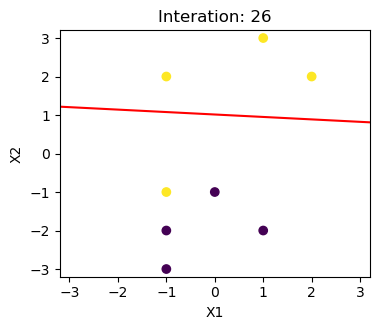

Iteration: 27 | Weights: [0.05350454 0.87330809] | Bias: -0.8900000000000006


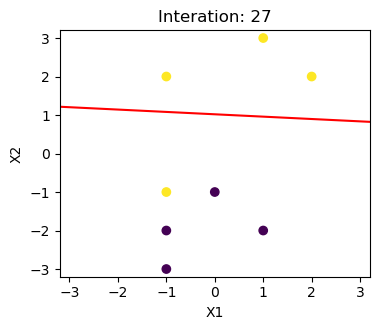

Iteration: 28 | Weights: [0.05313544 0.8981591 ] | Bias: -0.9200000000000006


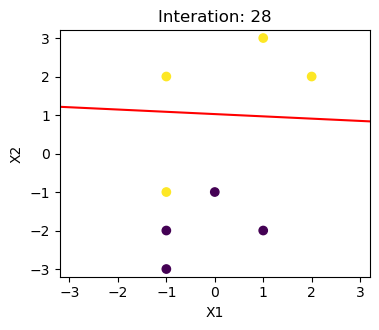

Iteration: 29 | Weights: [0.05278107 0.92305047] | Bias: -0.9500000000000006


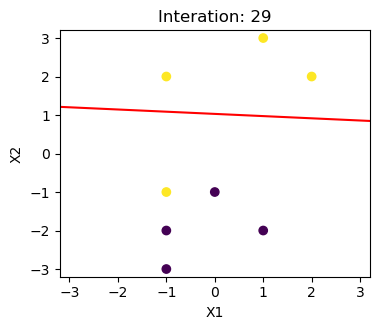

Iteration: 30 | Weights: [0.03253351 0.92807242] | Bias: -0.9700000000000006


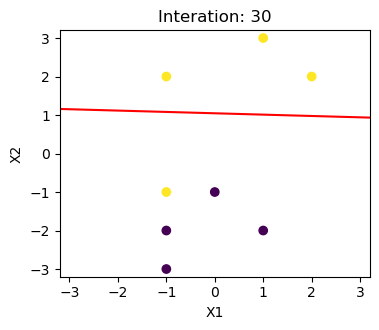

Iteration: 31 | Weights: [0.03230805 0.95313859] | Bias: -1.0000000000000007


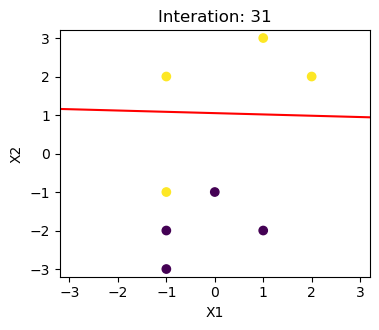

Iteration: 32 | Weights: [0.03209073 0.97823356] | Bias: -1.0300000000000007


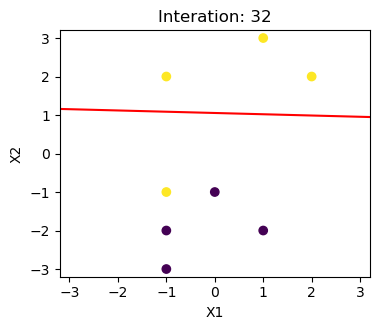

Iteration: 33 | Weights: [0.03188104 1.00335543] | Bias: -1.0600000000000007


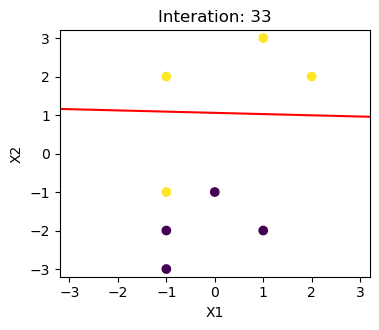

Iteration: 34 | Weights: [0.0117607  1.00858471] | Bias: -1.0800000000000007


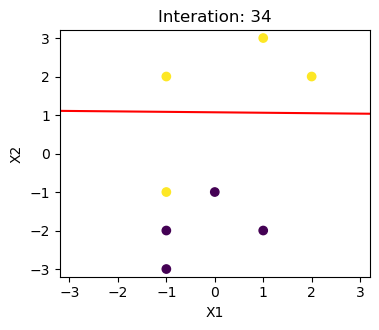

Iteration: 35 | Weights: [0.01165572 1.03384631] | Bias: -1.1100000000000008


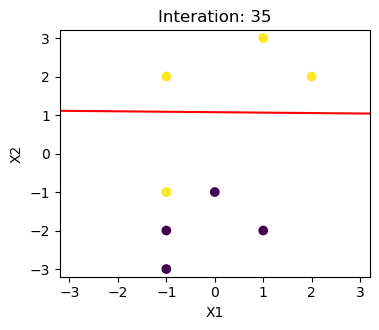

Iteration: 36 | Weights: [0.01155412 1.05912722] | Bias: -1.1400000000000008


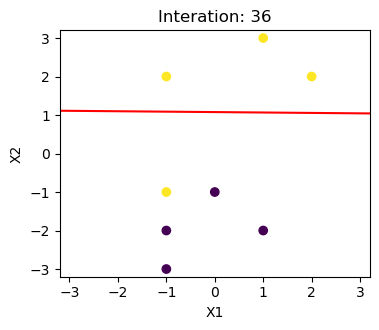

Iteration: 37 | Weights: [-0.00846875  1.06450187] | Bias: -1.1600000000000008


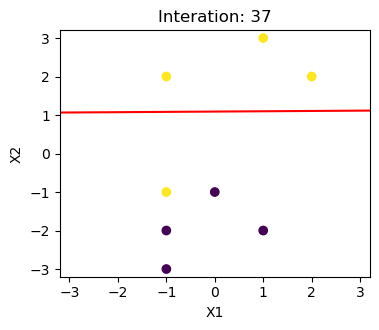

Iteration: 38 | Weights: [-0.00848044  1.08990186] | Bias: -1.1900000000000008


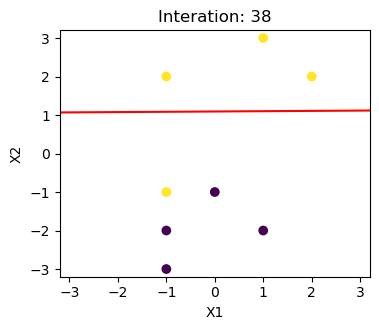

Iteration: 39 | Weights: [0.0014826 1.0953668] | Bias: -1.2100000000000009


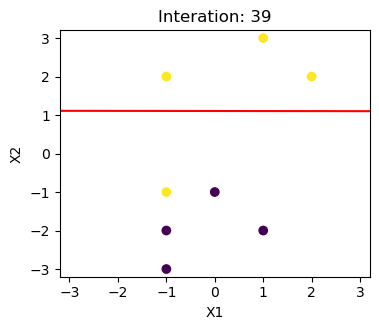

Iteration: 40 | Weights: [0.00143176 1.12087315] | Bias: -1.2400000000000009


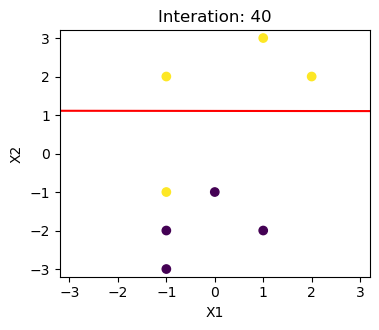

Iteration: 41 | Weights: [-0.01854945  1.12645773] | Bias: -1.260000000000001


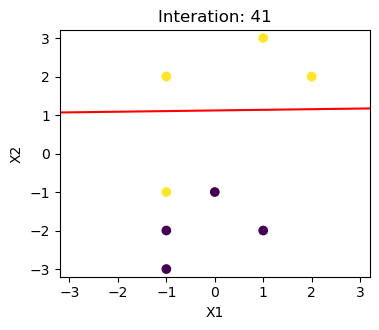

Iteration: 42 | Weights: [-0.00854547  1.13210704] | Bias: -1.280000000000001


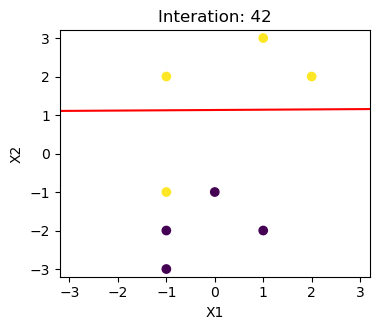

Iteration: 43 | Weights: [0.00142125 1.13783637] | Bias: -1.300000000000001


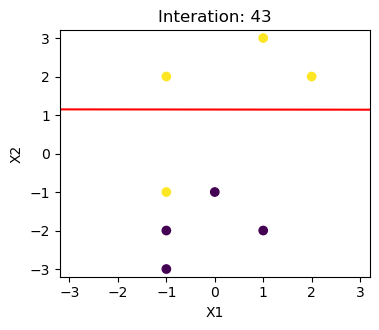

Iteration: 44 | Weights: [0.00137524 1.1635964 ] | Bias: -1.330000000000001


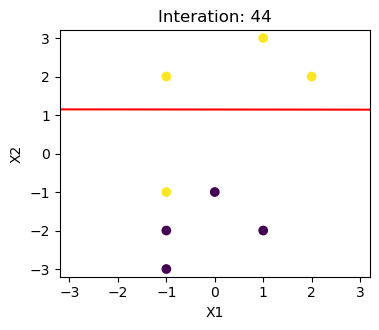

Iteration: 45 | Weights: [0.01130822 1.16940346] | Bias: -1.350000000000001


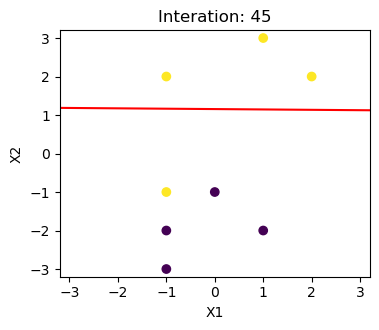

Iteration: 46 | Weights: [-0.00870933  1.17529871] | Bias: -1.370000000000001


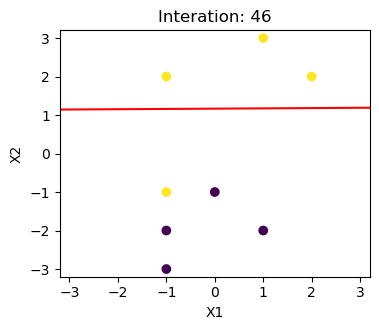

Iteration: 47 | Weights: [-0.00871797  1.20120164] | Bias: -1.400000000000001


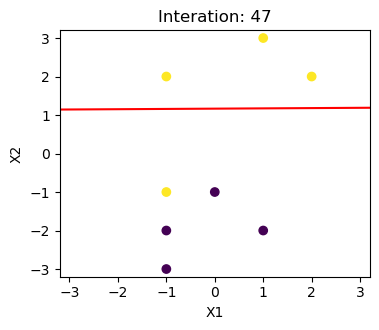

Iteration: 48 | Weights: [0.00125279 1.2071452 ] | Bias: -1.420000000000001


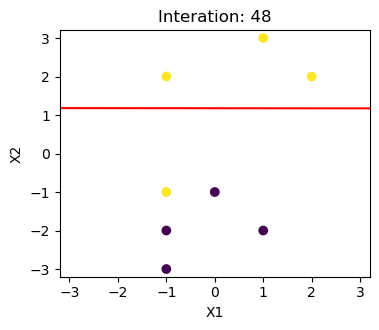

Iteration: 49 | Weights: [0.01119163 1.21315206] | Bias: -1.440000000000001


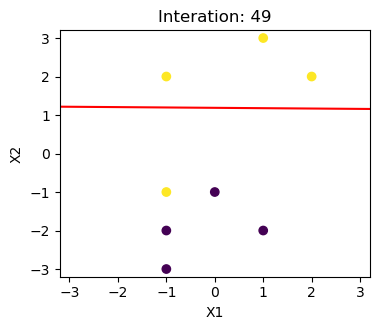

Iteration: 50 | Weights: [-0.00882415  1.21923543] | Bias: -1.460000000000001


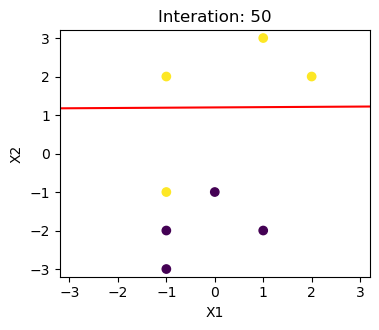

Iteration: 51 | Weights: [-0.00883175  1.24532161] | Bias: -1.490000000000001


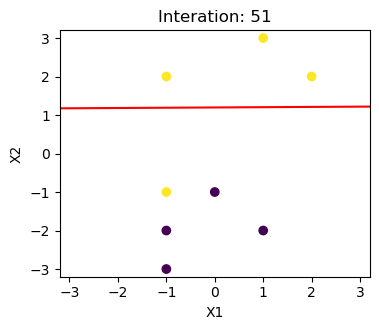

Iteration: 52 | Weights: [1.14160842e-03 1.25144122e+00] | Bias: -1.5100000000000011


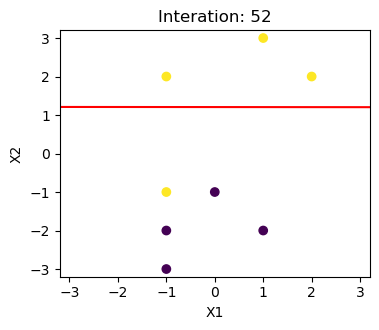

Iteration: 53 | Weights: [1.10424988e-03 1.27757779e+00] | Bias: -1.5400000000000011


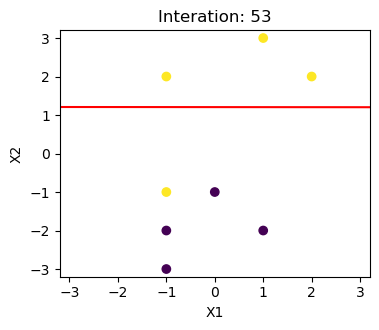

Iteration: 54 | Weights: [-0.00889902  1.26379728] | Bias: -1.5500000000000012


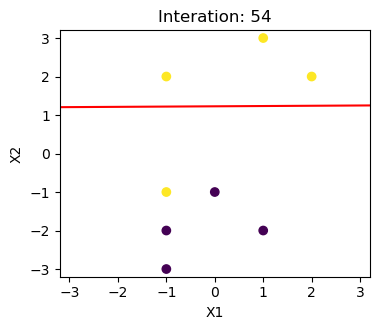

Iteration: 55 | Weights: [-0.00890585  1.29003826] | Bias: -1.5800000000000012


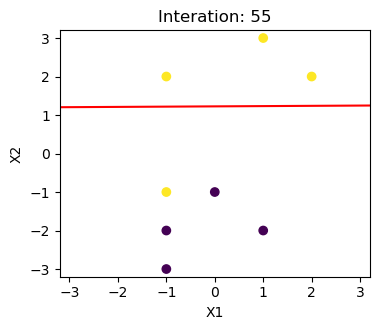

Iteration: 56 | Weights: [1.06961944e-03 1.29630710e+00] | Bias: -1.6000000000000012


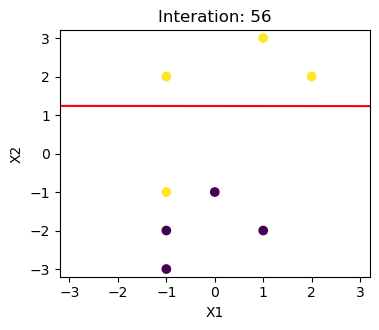

Iteration: 57 | Weights: [1.03508111e-03 1.32258867e+00] | Bias: -1.6300000000000012


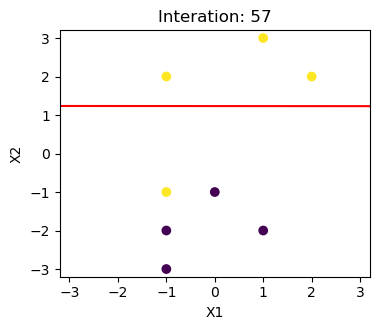

Iteration: 58 | Weights: [-0.00896777  1.30894455] | Bias: -1.6400000000000012


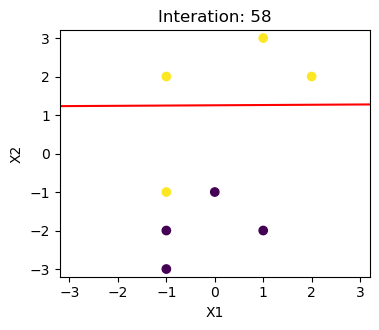

Iteration: 59 | Weights: [-0.00897395  1.33531779] | Bias: -1.6700000000000013


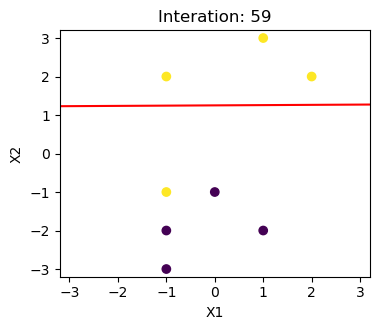

Iteration: 60 | Weights: [1.00333058e-03 1.34171448e+00] | Bias: -1.6900000000000013


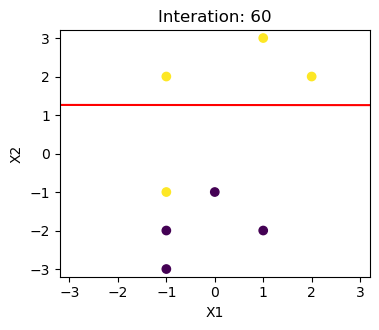

Iteration: 61 | Weights: [0.01095485 1.34815341] | Bias: -1.7100000000000013


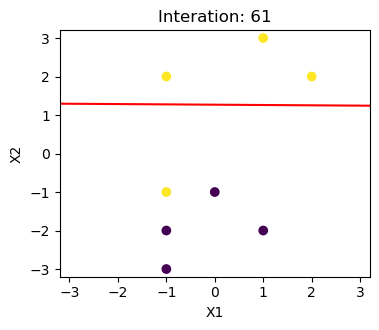

Iteration: 62 | Weights: [-0.00905727  1.35464599] | Bias: -1.7300000000000013


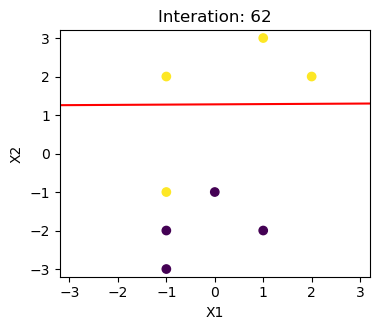

Iteration: 63 | Weights: [-0.00906284  1.38113331] | Bias: -1.7600000000000013


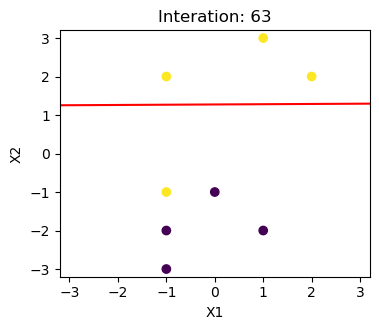

Iteration: 64 | Weights: [9.16086543e-04 1.38764054e+00] | Bias: -1.7800000000000014


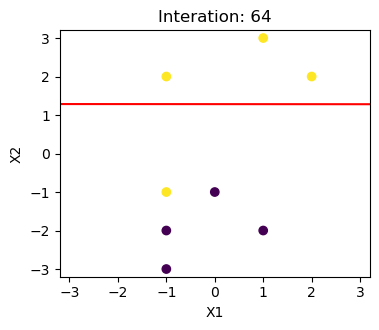

Iteration: 65 | Weights: [0.0108708  1.39418545] | Bias: -1.8000000000000014


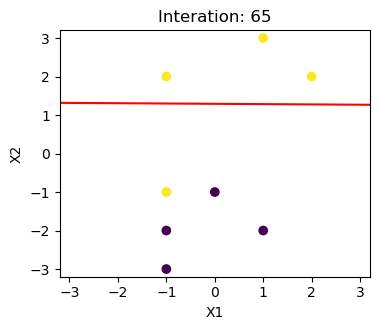

Iteration: 66 | Weights: [-0.00914039  1.4007789 ] | Bias: -1.8200000000000014


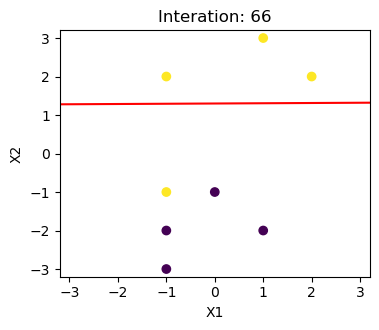

Iteration: 67 | Weights: [-0.00914542  1.42736567] | Bias: -1.8500000000000014


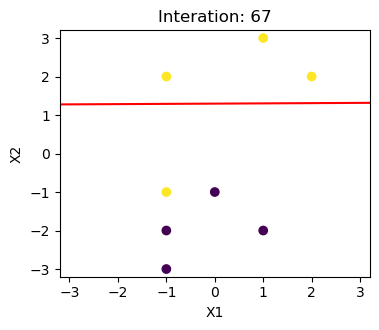

Iteration: 68 | Weights: [8.34937790e-04 1.43396947e+00] | Bias: -1.8700000000000014


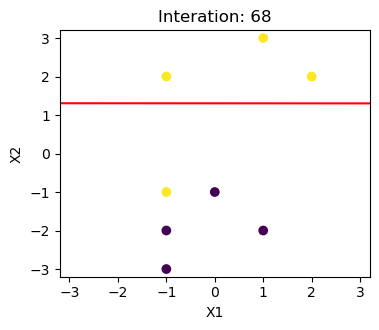

Iteration: 69 | Weights: [0.01079246 1.44060716] | Bias: -1.8900000000000015


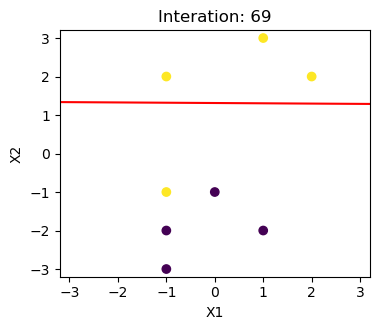

Iteration: 70 | Weights: [-0.00921791  1.44728907] | Bias: -1.9100000000000015


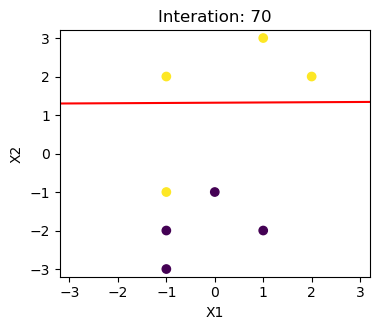

Iteration: 71 | Weights: [7.63441925e-04 1.45399139e+00] | Bias: -1.9300000000000015


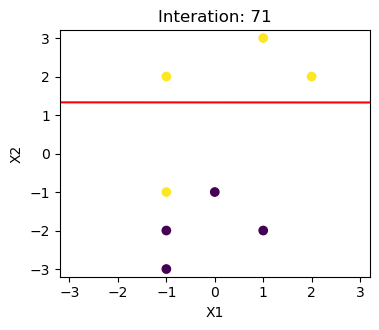

Iteration: 72 | Weights: [7.36771714e-04 1.48069682e+00] | Bias: -1.9600000000000015


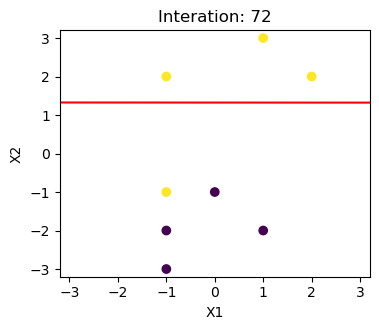

Iteration: 73 | Weights: [-0.01925115  1.48742718] | Bias: -1.9800000000000015


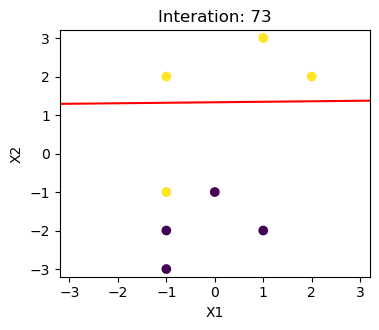

Iteration: 74 | Weights: [-0.00924737  1.49417636] | Bias: -2.0000000000000013


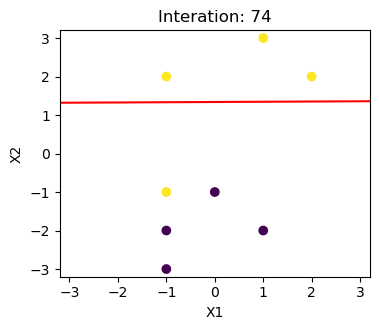

Iteration: 75 | Weights: [7.35032976e-04 1.50095445e+00] | Bias: -2.020000000000001


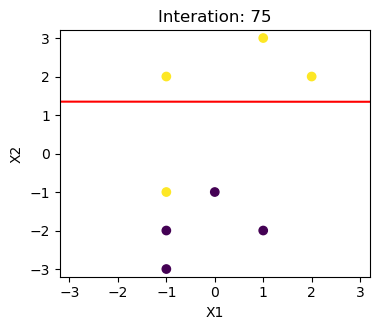

Iteration: 76 | Weights: [7.09824902e-04 1.52773434e+00] | Bias: -2.0500000000000003


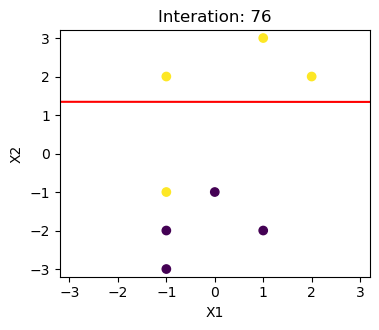

Iteration: 77 | Weights: [-0.00929165  1.51456271] | Bias: -2.06


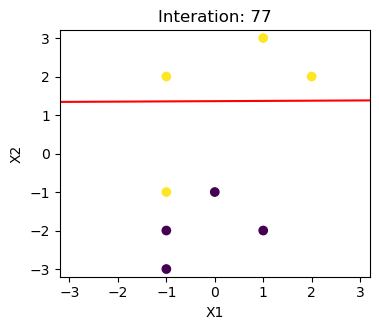

Iteration: 78 | Weights: [-0.00929566  1.54139721] | Bias: -2.0899999999999994


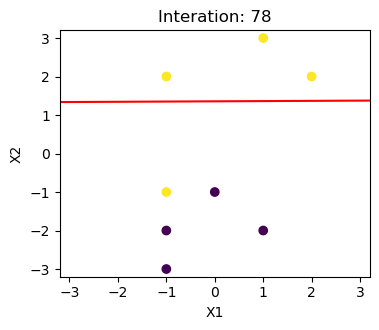

Iteration: 79 | Weights: [6.87731936e-04 1.54824274e+00] | Bias: -2.109999999999999


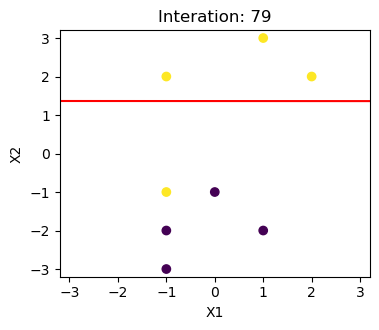

Iteration: 80 | Weights: [6.63877666e-04 1.57508900e+00] | Bias: -2.1399999999999983


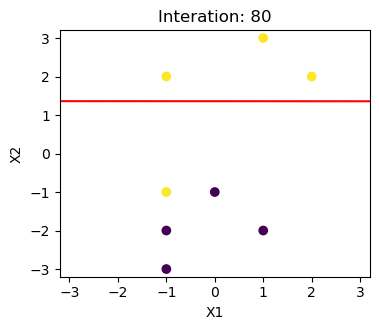

Iteration: 81 | Weights: [-0.00933743  1.5619804 ] | Bias: -2.149999999999998


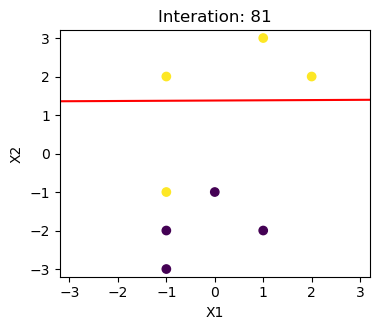

Iteration: 82 | Weights: [-0.00934116  1.58887673] | Bias: -2.1799999999999975


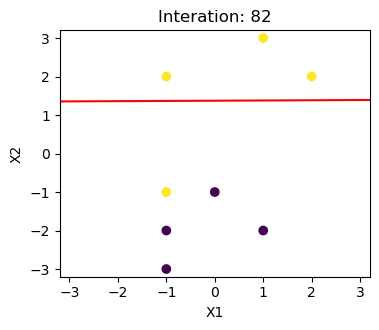

Iteration: 83 | Weights: [6.43120393e-04 1.59578271e+00] | Bias: -2.199999999999997


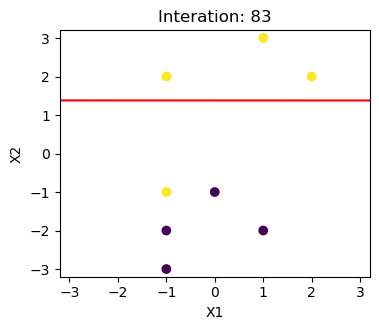

Iteration: 84 | Weights: [6.20485984e-04 1.62268855e+00] | Bias: -2.2299999999999964


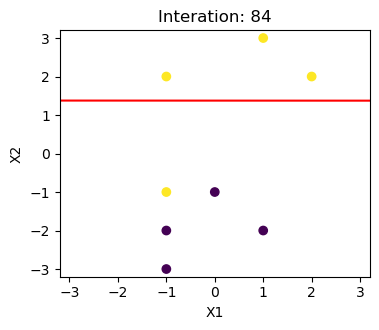

Iteration: 85 | Weights: [-0.00938068  1.60963659] | Bias: -2.239999999999996


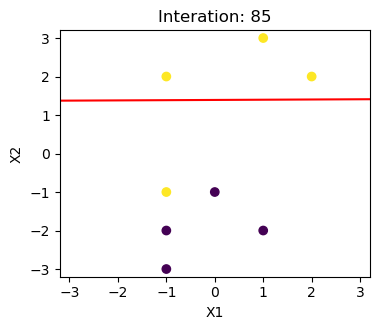

Iteration: 86 | Weights: [-0.00938416  1.63658857] | Bias: -2.2699999999999956


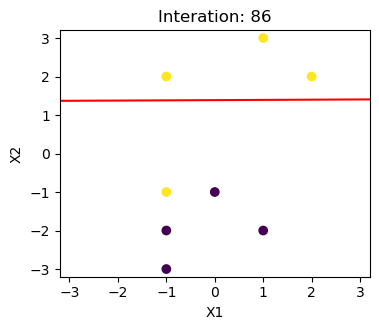

Iteration: 87 | Weights: [6.00926886e-04 1.64354901e+00] | Bias: -2.289999999999995


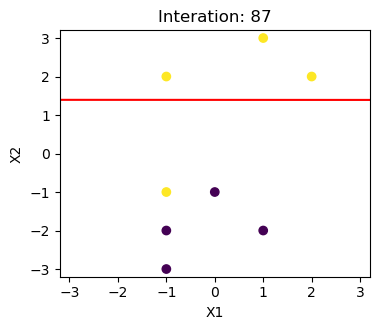

Iteration: 88 | Weights: [0.01056804 1.65053132] | Bias: -2.3099999999999947


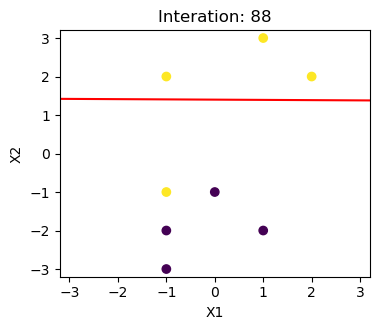

Iteration: 89 | Weights: [-0.00943971  1.65754395] | Bias: -2.3299999999999943


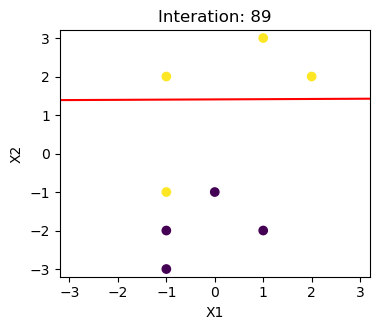

Iteration: 90 | Weights: [5.45964075e-04 1.66456840e+00] | Bias: -2.349999999999994


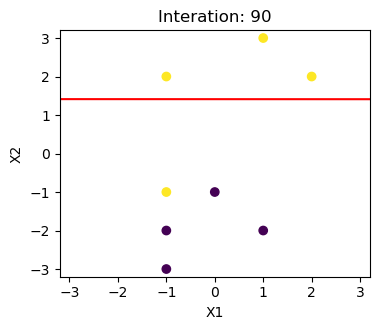

Iteration: 91 | Weights: [5.25240107e-04 1.69159122e+00] | Bias: -2.3799999999999932


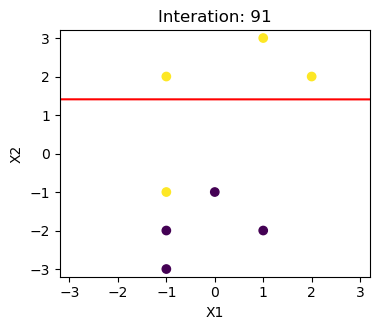

Iteration: 92 | Weights: [-0.00947567  1.67865156] | Bias: -2.389999999999993


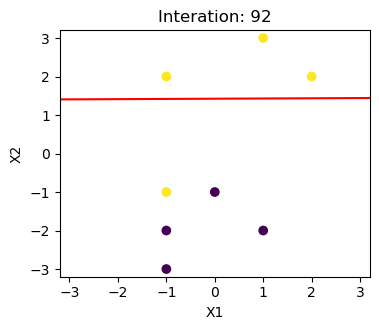

Iteration: 93 | Weights: [-0.00947872  1.70571415] | Bias: -2.4199999999999924


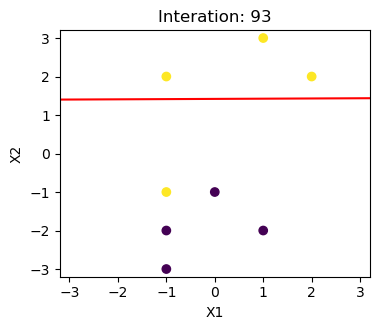

Iteration: 94 | Weights: [5.07631022e-04 1.71278320e+00] | Bias: -2.439999999999992


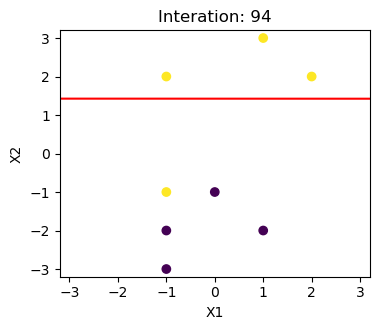

Iteration: 95 | Weights: [4.87843503e-04 1.73985013e+00] | Bias: -2.4699999999999913


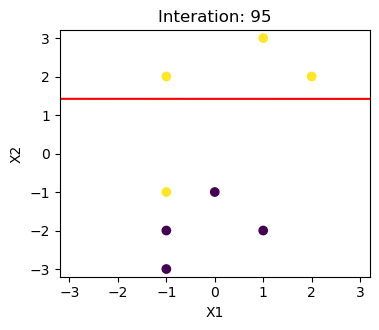

Iteration: 96 | Weights: [-0.00951297  1.7269525 ] | Bias: -2.479999999999991


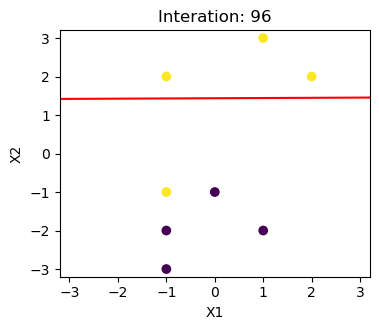

Iteration: 97 | Weights: [-0.00951583  1.75405651] | Bias: -2.5099999999999905


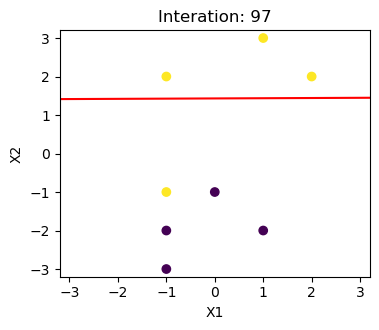

Iteration: 98 | Weights: [4.71139115e-04 1.76116624e+00] | Bias: -2.52999999999999


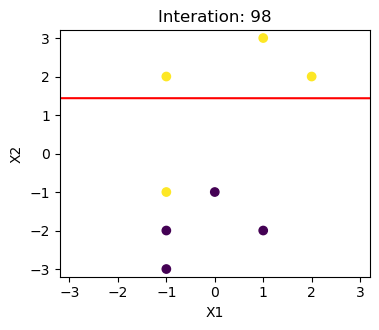

Iteration: 99 | Weights: [0.01044211 1.76829365] | Bias: -2.5499999999999896


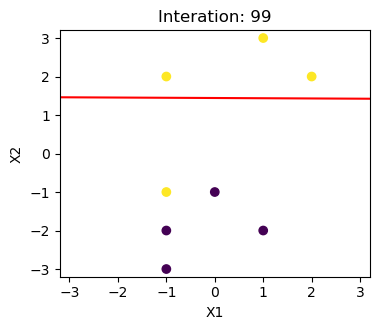

Iteration: 100 | Weights: [-0.00956459  1.77544637] | Bias: -2.569999999999989


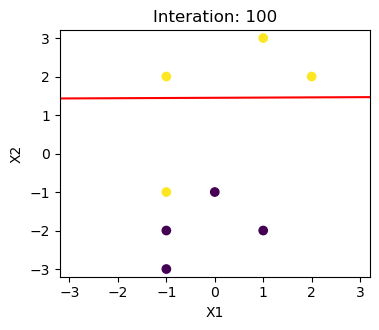

In [101]:
svm = SVM(learning_rate=0.01, epochs=100)
svm.fit(X, Y)

### Prediction (SVM)

In [102]:
y_pred_svm = svm.predict(X)
print("Predicted values:", y_pred_svm)
print("Actual values   :", Y)

Predicted values: [1 0 1 0 1 0 0 0]
Actual values   : [1 0 1 0 1 0 0 1]


### Accuracy (SVM)

In [103]:
acc = accuracy(Y, y_pred_svm)
print("Accuracy:", acc * 100, "%")

Accuracy: 87.5 %
